# Convulutional Neural Netowrk
# Binary Classification DOGS vs CATS

## 1) Importing the packages and data pre-processing

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

First we are pre-processing the training set

In [4]:
train_idm = ImageDataGenerator(
    rescale = 1./255, # Every pixel takes a vale between [0,255], which means, by dividing for 255 we can normalizate them a turning them into [0,1]
    shear_range = 0.2, #intensity of the cut shear of every image
    zoom_range = 0.2, # apply a random zoom to the images.  It means this zoom can vary in the next set of number [80%,120%]
    horizontal_flip = True # this allows the horizontal rotation of some images randomly. Reduces overfitting.
)

################ Now we have to join the instance train_idm to the data training set. 

training_generator = train_idm.flow_from_directory(
    'dataset/training_set',  #we give it the location to look for the trianing set.
    target_size = (64,64), #The final size of the images to feed the CNN
    batch_size = 32, #batch size, aka as the amount of images in the trianing batch. 32 is a standar number.
    class_mode = 'binary' #here we coulduse categorical (if #categories >= 3 or binary if #categories = 2)
)


Found 8000 images belonging to 2 classes.


Now we are going to process the test set

In [5]:
test_idm = ImageDataGenerator(rescale=1./255) #We just need the normalization of the pixels values. If we apply the other changes, would be like 
#having data leaking. Why? Because we use all those other parameters to train the model depending of how the image is uploaded, not to change one
# that we want to predict.

testing_generator = test_idm.flow_from_directory(
    'dataset/test_set',
    target_size = (64,64), # same as training
    batch_size =32, #same as training
    class_mode = 'binary' #same as training
)



Found 2000 images belonging to 2 classes.


## 2) From Image to Vector, Building the NN

Same as in an ANN we need to create the layers. We want to follow a procedure to transforme the data from an image, to a vector.

<u>First - Convolution</u>: Use of feature detectors(filters) to create the convolutional layer made of feature maps. We can select multiple architectures, but a standar one could be 2 layers, which each one is going to have 32 filters. <u>NOTE</u> Feel free to try multiple variations.

<u>Second - Pooling</u>: Use a function to generalize the model, and avoid overfitting.

<u>Third - Flattering</u>: Taking the pooling layer and flatering in into a one dimension vector.

<u>Forth - Full Connection</u>: Create the "hidden layer". Which in this case it is a fully connected layer (it is the same but fully connected)

In [6]:
cnn = tf.keras.models.Sequential() # we initialize the CNN

# 1) Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32 #As we said prior start this code, we are going to try 32 filters
                              , kernel_size = 3 #We are going to use 3x3 pixels sized filters. Note that you could try 5x5 or 7x7 
                              , activation = 'relu' #Rectifier function to break linearity, a standard one is the rectifier linear unit f(x)= max(0,x)
                              , input_shape = [64,64,3] # 64,64 is the size of the images. 3 is because we are working with colored images. 
                                                        # The 3 color channels are RGB (red,green,blue). In white and black it would be just 1.
                              )) 

# 2) Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, #size of the pooling, in this case a 2x2 pixels. 
                              strides = 2 # the step to move the pool filter, in this case it is 2 pixels at a time.
                              ))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now we repeat this both layers.

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')) 
# Note that we remove the input shape since it knows that the shape is the output of the last pooling layer.
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides = 2))

In [8]:
# 3) Flattening
cnn.add(tf.keras.layers.Flatten()) #this is the class that is going to flat our layer.

# 4) Full connection
cnn.add(tf.keras.layers.Dense(units= 128, activation='relu'))  #The number of neurons may vary when building a NN. 

# 5) Final layer
cnn.add(tf.keras.layers.Dense(units= 1, activation='sigmoid')) #We use only 1 neuron since we only have 2 classes.

## 3) Train the Neural Network

The difference with a ANN is that here we are training and testing at the same time since we are dealing with a visual problem.

In [9]:
cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy']) # 1) Optimizer: Adam) we are going to use the Adaptative Moment Estimation. 
                                               #2) Loss Function:  binary_crossentropy, since we are dealing with a binary problem this is the most adecuate function
                                               #3) Metrics: for this example we are only going to use the accuracy, but we could add more
cnn.fit(x = training_generator,  #this is the common trianing set
        validation_data = testing_generator,  #here we use the validation data to tell the NN how it is doing
        epochs = 25)  # The amount of epochs in CNN has to be way lower than in an ANN. 10 was too little, and 15 too so the good one that seemed to work is 25.


Epoch 1/25


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 108s 416ms/step - accuracy: 0.5381 - loss: 0.6931 - val_accuracy: 0.6775 - val_loss: 0.6305
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.6511 - loss: 0.6307 - val_accuracy: 0.7010 - val_loss: 0.5833
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 112ms/step - accuracy: 0.6917 - loss: 0.5811 - val_accuracy: 0.7525 - val_loss: 0.5260
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.7239 - loss: 0.5336 - val_accuracy: 0.7095 - val_loss: 0.5642
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 109ms/step - accuracy: 0.7568 - loss: 0.4945 - val_accuracy: 0.7475 - val_loss: 0.5125
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 109ms/step - accuracy: 0.7656 - loss: 0.4840 - val_accuracy: 0.7510 - val_loss: 0.5148
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 110ms/step - accuracy: 0.7771 - loss: 0.4694 - val_accuracy: 0.7290 - val_loss: 0.5587
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 110ms/step - accuracy: 0.7843 - loss: 0.4493 - va

In [12]:
training_generator.class_indices

{'cats': 0, 'dogs': 1}

So we got a CNN with a 91% accuracy. Also if the output neuron takes a value of 0 then it means it predicts the animal in the image is a cat. On the other hand, if it takes the value of 1 then it infers it is a dog. Next we are going to try with some options to see how it looks.

## 4) Making predictions

We have to remember that, in order to make a prediction, we have to transform the image into the vector that we are going to introduce to the CNN.

### a) Importing the packages and creating the function.

In [44]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predicting_image(image_name):
    loaded_image = image.load_img(image_name, target_size = (64,64)) #Load the image using keras. We use the same size that we used to train the model (64.64)
    array_image = image.img_to_array(loaded_image) #turn it into a numeric values
    array_image_normalized = array_image / 255.0 # normlize same as when we trained the NN
    test_image = np.expand_dims(array_image_normalized, axis = 0) #IMPORTANT the NN was trained by using a batch of images, it means, it recieves
    # a batch like this (batch_size, height, width, channels). So far we only have 1 image like this (64,64,3), so we need to add the size batch.
    # We do this by exapanding it, where when we expand we add in the first position (axis =0) the amount of pictures, it means 1. Finally, the
    # batch test_image is actually this amount of dimensions (1,64,64,3)
    result = cnn.predict(test_image)
    final_output = result[0][0]
    print()
    if final_output >= 0.5: 
        return (int(round(100*final_output,0)), 'dog') 
    elif final_output < 0.5: 
        return (int(round(100*(1-final_output),0)), 'dog') 
    else:
        return (0,'Something went Wrong, the result is neither dog or cat')
    
    

### b) Showing the image.

In [18]:
from PIL import Image
from IPython.display import display

def show_image(image_path):
    original_image = Image.open(image_path)
    new_width = 300 
    new_height = 200 
    resized_image = original_image.resize((new_width, new_height))
    display(resized_image)


### C) Finally making the prediction!!! 

Option a)

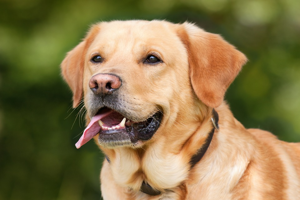

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

The NN is 100%  that the image is a dog


In [45]:
path_to_image = 'dataset/single_prediction/cat_or_dog_1.jpg'
show_image(path_to_image)
prediction = predicting_image(path_to_image)
print(f'The NN is ' + str(prediction[0]) +'%  that the image is a ' +prediction[1])

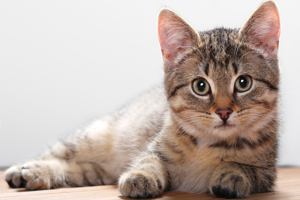

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

The NN is 82% sure that the image is a dog


In [46]:
path_to_image = 'dataset/single_prediction/cat_or_dog_2.jpg'
show_image(path_to_image)
prediction = predicting_image(path_to_image)
print(f'The NN is ' + str(prediction[0]) +'%' + ' sure that the image is a ' +prediction[1])

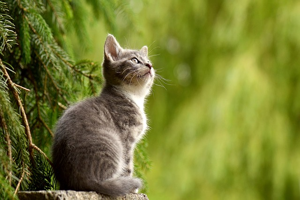

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

The NN is 55% sure that the image is a dog


In [47]:
path_to_image = 'dataset/single_prediction/cat_or_dog_3.jpg'
show_image(path_to_image)
prediction = predicting_image(path_to_image)
print(f'The NN is ' + str(prediction[0]) +'%' + ' sure that the image is a ' +prediction[1])

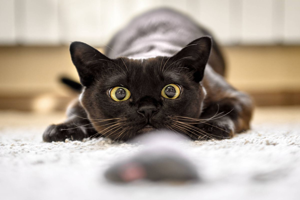

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

The NN is 76% sure that the image is a dog


In [48]:
path_to_image = 'dataset/single_prediction/cat_or_dog_4.jpg'
show_image(path_to_image)
prediction = predicting_image(path_to_image)
print(f'The NN is ' + str(prediction[0]) +'%' + ' sure that the image is a ' +prediction[1])

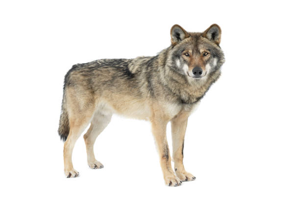

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

The NN is 51% sure that the image is a dog


In [49]:
path_to_image = 'dataset/single_prediction/cat_or_dog_5.jpg'
show_image(path_to_image)
prediction = predicting_image(path_to_image)
print(f'The NN is ' + str(prediction[0]) +'%' + ' sure that the image is a ' +prediction[1])